<a href="https://colab.research.google.com/github/lrnrdr/Prediction-of-Product-Sales/blob/main/prediction_of_podruct_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: (Prediction of Product Sales).
- Author: Loraine Rodriguez





## Loading Data

In [ ]:

import pandas as pd
# file path
df = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
# load in the data
df = pd.read_csv(df)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# df.head()
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
## df.info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning

In [ ]:
# How many rows and columns?
df.shape

(8523, 12)

In [ ]:
# What are the datatypes of each variable?
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
# 3) Are there duplicates? If so, drop any duplicates.
duplicate_count = df.duplicated().sum()
print("Number of duplicates:", duplicate_count)

Number of duplicates: 0


In [ ]:
# 3 answer (There are no duplicates)

In [ ]:
# 4) Identify missing values.  This will tell you which columns have nulls/blanks/missing values.

missing_values =df.isnull().sum()

# Display the missing values DataFrame and missing value counts
print(missing_values)


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [ ]:
# 4 continued-  The Item_Weight and Outlet_Size columns are missing values/null.

In [ ]:
# This is 1 way to see what values are under the column "Outlet_Size"
# since we established that the "Outlet_Size" column had (null/blank/missing values).
#  Con - With this function you can only see one column at a time.

df['Outlet_Size']
df['Outlet_Size'].value_counts()

# you can see that the values under this column are Medium, Small, High.  It doesn't show nulls on this.

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# 5) Address the missing values by using a placeholder value.  Since this value is a object (not a number) we will be replacing
# null values with the word MISSING which is what we were told to put.    There cannot be nulls, there has to be something in there
# it cannot be blank so we are putting the word MISSING so it won't be blank/null.

df['Outlet_Size'] = df['Outlet_Size'].fillna('MISSING')


In [ ]:
# 5) continued-rerunning to make sure there are no Nulls.  Now that nulls are changed to MISSING.
# There are no missing values in Outlet Size.

df['Outlet_Size'].value_counts()

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [ ]:
# 5) continued- Replacing "Items_weight" nulls with placeholder -1
df['Item_Weight'] = df['Item_Weight'].fillna(-1)

In [ ]:
# 6) Confirm that there are no missing values after addressing them.
#  After changes have now been done on both Outlet_Size and Item_Weight

missing_values = df.isnull().sum()
print(missing_values)



Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [ ]:
# 6 answer (There are no longer any nulls/missing values since these are all 0's)

In [ ]:
# 7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent
## This is one way.  I looked at data myself and thought I would check this one out to see if any issues.  After running this
# function you can see that there are issues with (Low Fat, LF, and low fat should be combined) and (Regular and reg should be combined)
# See next 2 cells for example on how to see all values under columns all at once which is a better way

df['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# 7) Continued- First step to see all values for each column all at once instead of doing them one by one and opening new cells.  2nd step below.
incon_da = df.select_dtypes("object").columns
incon_da

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# 7) Continued- Step 2- to see all values for each column all at once instead of doing them one by one and opening new cells.
# This way you can see all columns and values all at once instead of individually by column.  After review all of this data the
# only one that needs to be fixed it Item_Fat_Content values as I pointed out earlier.

for col in incon_da:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [ ]:
# 7) continued-  Fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
# Will combine (Low Fat, LF, and low fat should be combined) and (Regular and reg should be combined)

In [ ]:
# 7) continued- Combining Low Fat, LF, and low fat values

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':"Low Fat",'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [ ]:
#  7) continued- Combining Regular and reg to fix final issue
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'reg':"Regular"})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

numerical_columns = df.select_dtypes(include=['int64', 'float64'])
summary_stats = numerical_columns.describe()
print(summary_stats)

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     10.478936         0.066132   140.992782                1997.831867   
std       6.720742         0.051598    62.275067                   8.371760   
min      -1.000000         0.000000    31.290000                1985.000000   
25%       6.650000         0.026989    93.826500                1987.000000   
50%      11.000000         0.053931   143.012800                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


## Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


For each numeric feature, we will plot the distribution and a boxplot.

In [ ]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = ${med_value:,.2f}");


  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

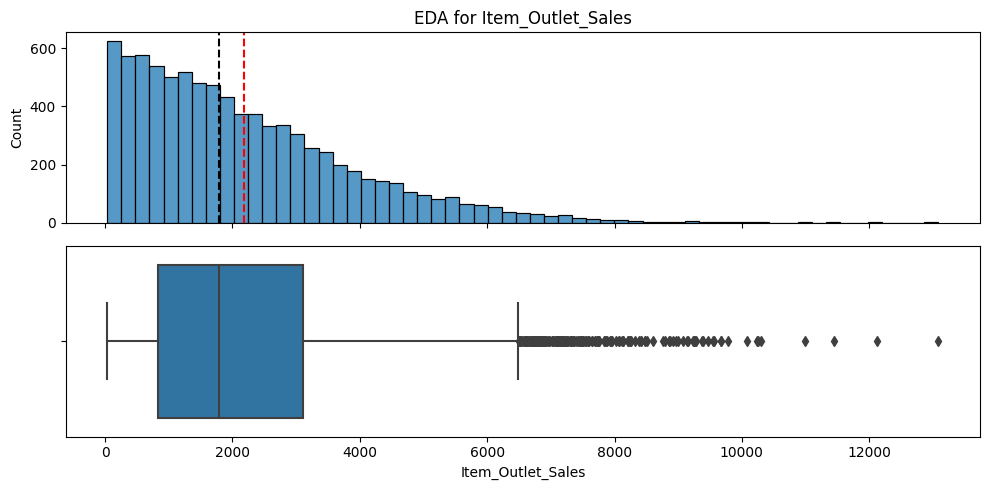

In [ ]:
plot_numeric(df,'Item_Outlet_Sales')

- Here on the boxplot, you can clearly see that there are several outliers in the Item_Outlet_Sales column. These could be valid data points, or they could be an error.


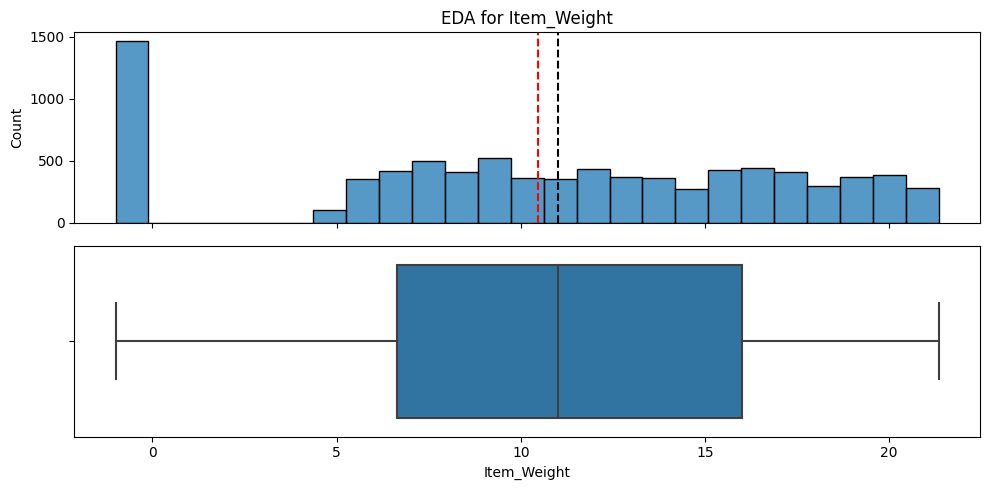

In [ ]:
plot_numeric(df,'Item_Weight')

- Next we will view the categorical counts of all of the object type columns and visualize this information with a barplot.

In [ ]:
def plot_bar(data,x, y, figsize=(20,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot

    ## counts, counts up the categories, sort the values, then puts them in a
    ## data frame.

    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


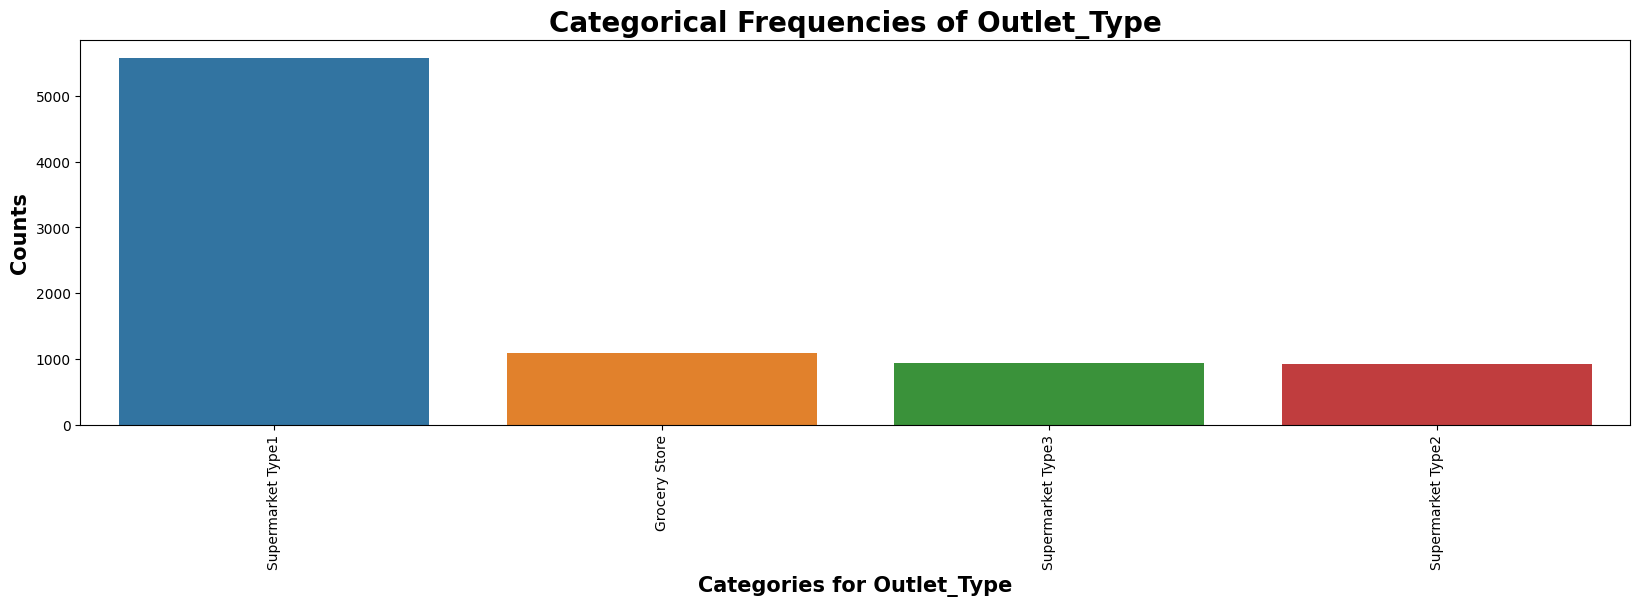

In [ ]:
fig, ax = plot_bar(df, 'Outlet_Type', 'Outlet_Type');
print(df['Outlet_Type'].value_counts())

- From this graph, we can see that there are mostly Supermarket Type1's in the  outlets.


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


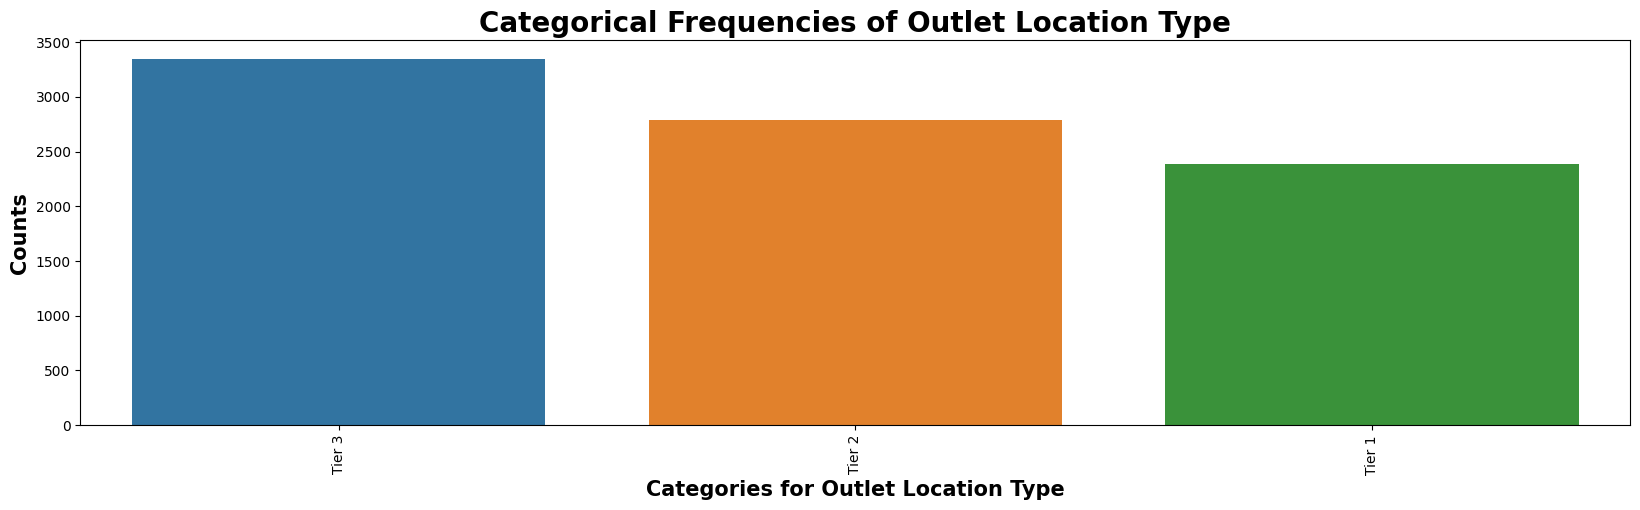

In [ ]:
fig, ax = plot_bar(df, 'Outlet_Location_Type', 'Outlet Location Type')
print(df['Outlet_Location_Type'].value_counts())

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64


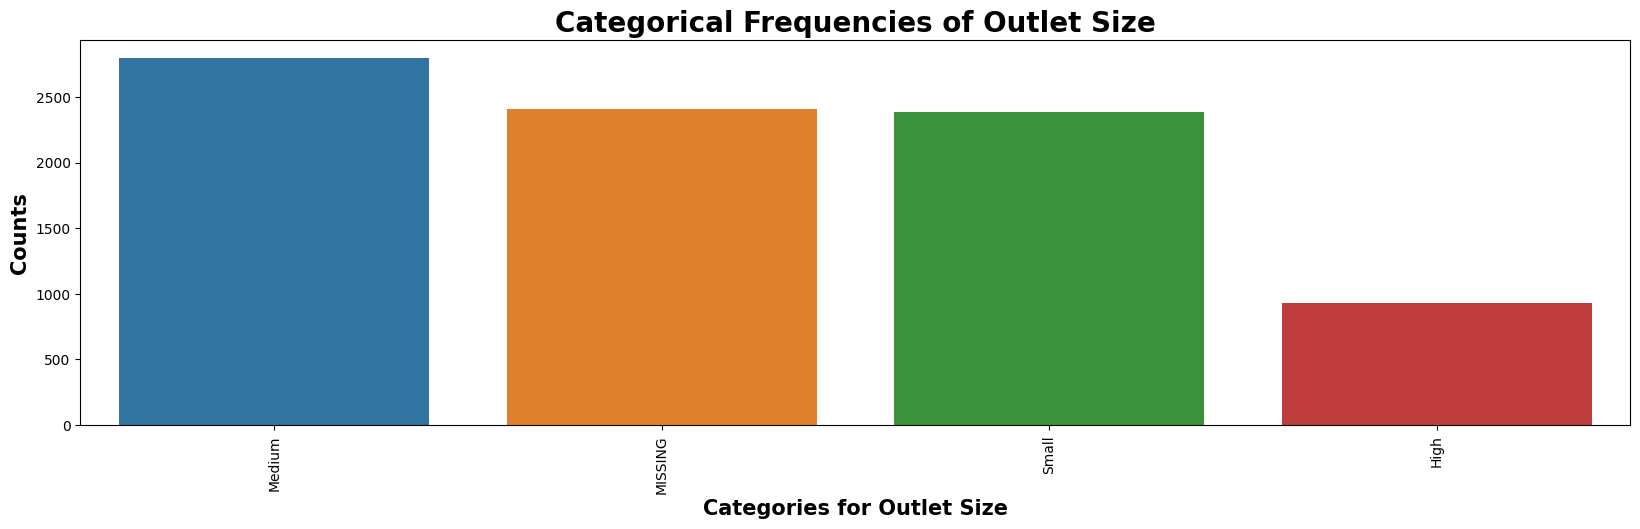

In [ ]:
fig, ax = plot_bar(df, 'Outlet_Size', 'Outlet Size')
print(df['Outlet_Size'].value_counts())

<ipython-input-138-556776f075b8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Blues');


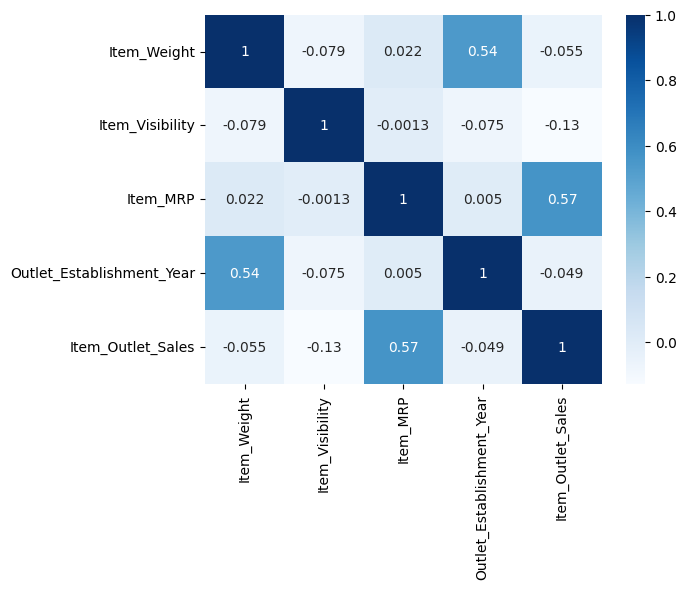

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='Blues');

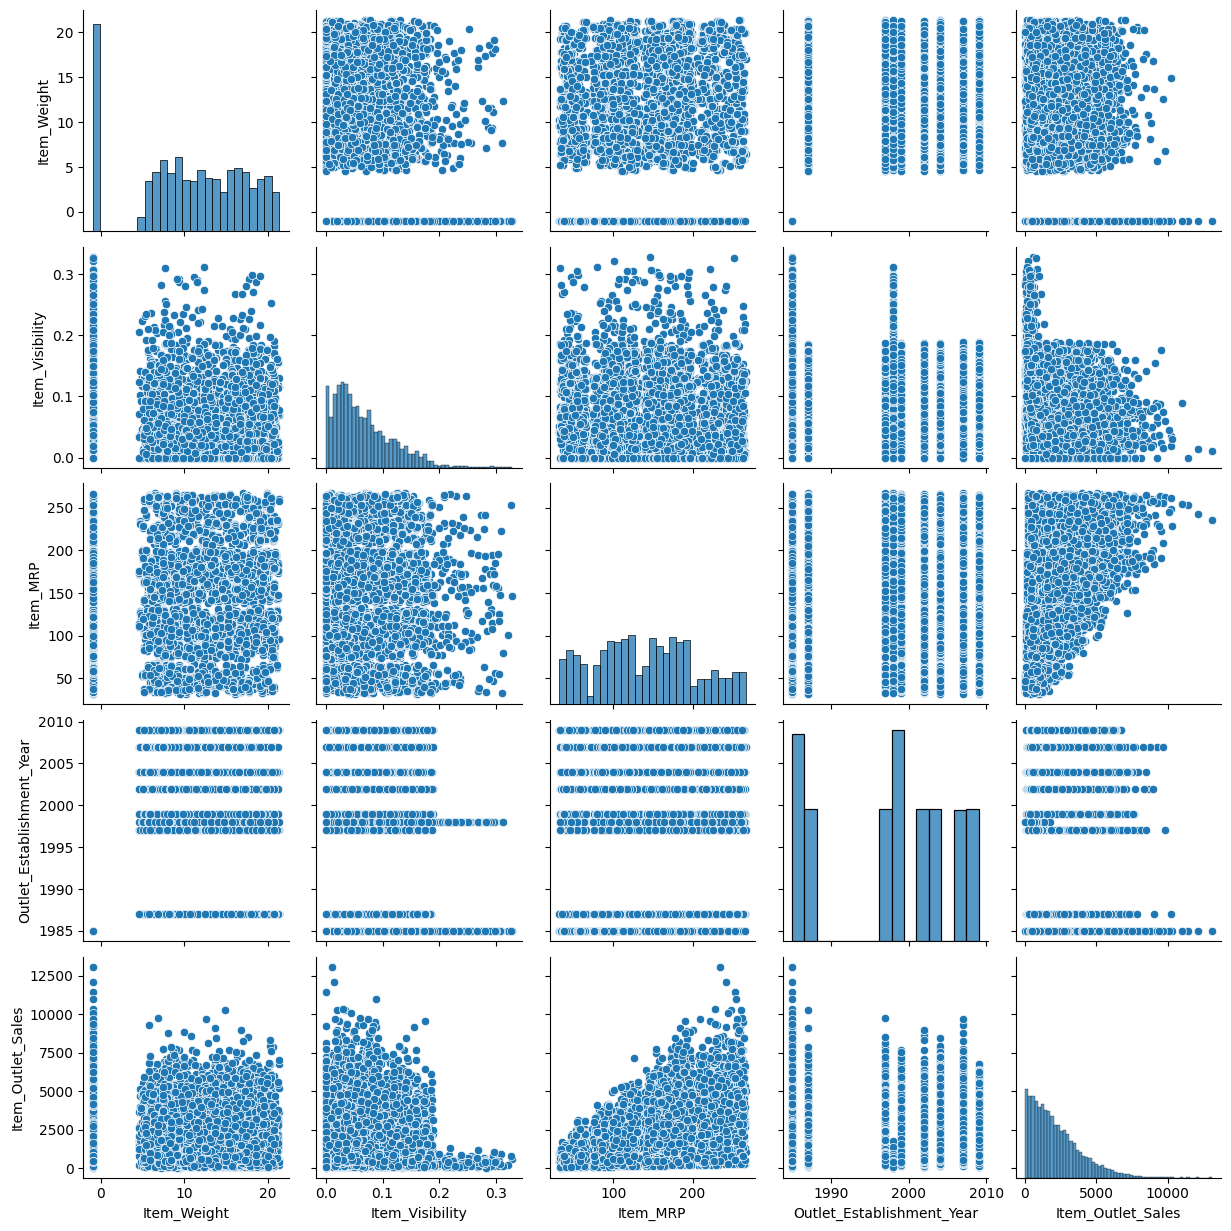

In [ ]:
sns.pairplot(df);

## Feature Inspection